In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import http.client

# conn = http.client.HTTPSConnection("bb-finance.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "88dcb86444msh43b9ba5d9a9995fp16a2d0jsn2c4f821f005e",
#     'x-rapidapi-host': "bb-finance.p.rapidapi.com"
# }

# conn.request("GET", "/stock/get-statistics?id=aapl%3Aus&template=STOCK", headers=headers)

# res = conn.getresponse()
# data = res.read()

# print(data.decode("utf-8"))

In [2]:
data  = pd.read_csv("IRFC.NS_stock_data.csv")

In [4]:
#data = pd.read_csv("nse_all_stock_data (1).csv")

In [5]:
data.head()

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363667,381938573,IRFC.NS
1,2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622095,72044464,IRFC.NS
2,2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442,IRFC.NS
3,2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889874,45816269,IRFC.NS
4,2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029,IRFC.NS


In [6]:
data.shape

(801, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  801 non-null    object 
 1   open        801 non-null    float64
 2   high        801 non-null    float64
 3   low         801 non-null    float64
 4   close       801 non-null    float64
 5   adjclose    801 non-null    float64
 6   volume      801 non-null    int64  
 7   ticker      801 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 50.2+ KB


In [7]:
data.describe()

,open,high,low,close,adjclose,volume
count,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02
mean,42.835081,43.664607,41.964919,42.734707,41.440633,4.366552e+07
std,37.956001,38.991619,36.665400,37.722622,38.284057,7.259336e+07
min,19.549999,19.700001,19.299999,19.500000,18.045340,0.000000e+00
25%,22.600000,22.799999,22.400000,22.549999,20.650248,7.029366e+06
50%,24.900000,25.200001,24.600000,24.799999,22.311247,1.657958e+07
75%,34.000000,34.700001,33.200001,33.849998,33.198494,4.244430e+07
max,185.800003,192.800003,171.500000,175.149994,175.149994,5.738700e+08


In [8]:
data.isnull().sum()

Unnamed: 0    0
open          0
high          0
low           0
close         0
adjclose      0
volume        0
ticker        0
dtype: int64

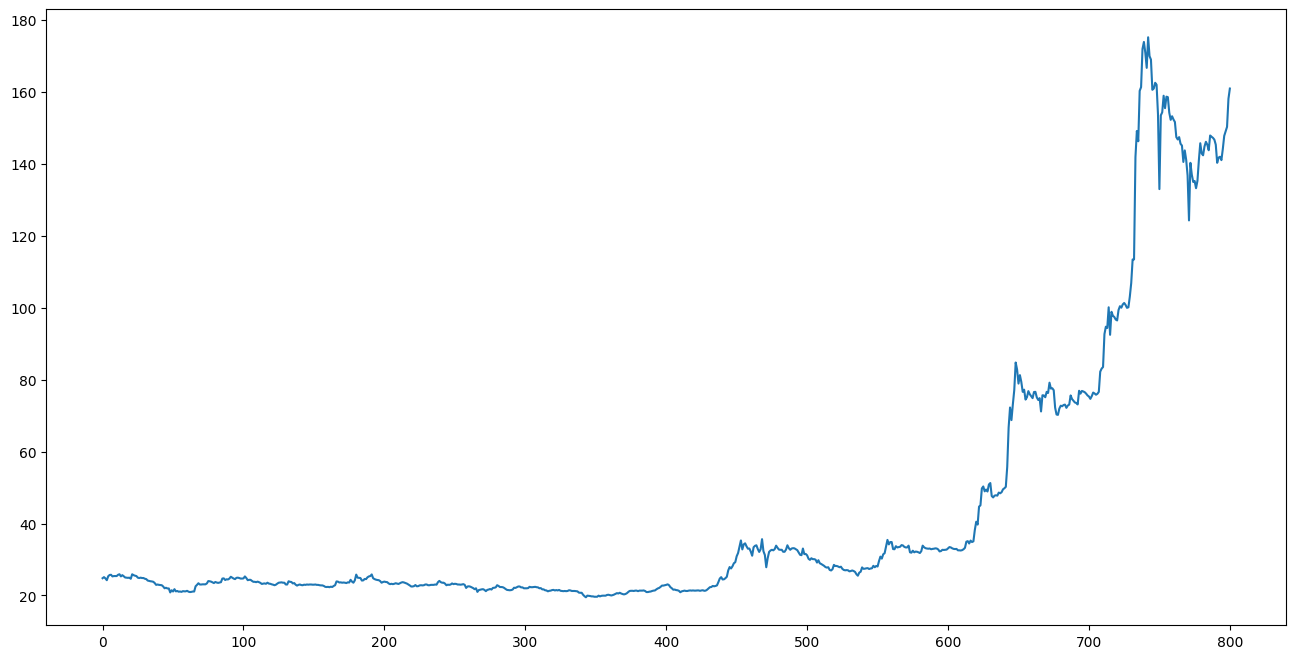

In [9]:
plt.figure(figsize=(16,8))
plt.plot(data["close"], label="Closing price")

In [10]:
data['open-close'] = data['open']- data['close']
data['high-low'] = data['high']- data['low']
data = data.dropna()

In [12]:
data.head()

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker,open-close,high-low
0,2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363667,381938573,IRFC.NS,0.100000,1.449999
1,2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622095,72044464,IRFC.NS,0.150000,0.500000
2,2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442,IRFC.NS,0.700001,0.750000
3,2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889874,45816269,IRFC.NS,0.549999,0.850000
4,2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029,IRFC.NS,-1.100000,1.949999


In [11]:
x = data[['open-close','high-low']]
x.head()

,open-close,high-low
0,0.100000,1.449999
1,0.150000,0.500000
2,0.700001,0.750000
3,0.549999,0.850000
4,-1.100000,1.949999


In [13]:
y= np.where(data['close'].shift(-1)>data['close'], 1, -1)

In [14]:
y

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1,  1,  1,  1

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 44)

In [16]:
#!pip install neighbors

In [17]:
#!pip install sklearn
#!pip install KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [19]:
#using gridsearch to find the best parameters

params = { 'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

In [20]:
#fit the model
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [21]:
#accuracy score
acc_train = accuracy_score(y_train,model.predict(x_train))
acc_test = accuracy_score(y_test,model.predict(x_test))

In [22]:
print('train_data accuracy: %2f' %acc_train)
print('test_data accuracy: %2f' %acc_test)

train_data accuracy: 0.720000
test_data accuracy: 0.552239


In [ ]:
#!pip install scikit-learn

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Assuming 'df' is your DataFrame containing historical stock data
# df = pd.read_csv('path_to_your_csv_file.csv')  # Load your data here
# data = df['Close'].values.reshape(-1, 1)  # Ensure 'Close' is the correct column

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(x)


In [25]:

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(x)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Example sequence length (past 60 days)
X, y = create_sequences(scaled_data, seq_length)


In [31]:

# Reshape X to be 3-dimensional for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))



In [27]:
# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Check the shapes to ensure correctness
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (592, 60, 1), y_train shape: (592,)
X_test shape: (149, 60, 1), y_test shape: (149,)


In [28]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\kiran\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 0.0536 - val_loss: 0.0143
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0040 - val_loss: 0.0123
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0027 - val_loss: 0.0114
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0024 - val_loss: 0.0114
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0023 - val_loss: 0.0114
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0023 - val_loss: 0.0113
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0021 - val_loss: 0.0114
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0021 - val_loss: 0.0113
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0019 - val_loss: 0.0115
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0020 - val_loss: 0.0114
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0019 - val_loss: 0.0114
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - l

In [32]:
# # Make predictions
# predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions)  # Inverse transform to get the original scale
# # Make predictions
predictions = model.predict(X_test)

# Check the shape of predictions
print("Shape of predictions before inverse transform:", predictions.shape)

# If predictions is of shape (149, 1) and scaler expects (149, 2), reshape predictions
if predictions.shape[1] == 1:
    predictions = np.hstack([predictions, predictions])

# Inverse transform to get the original scale
predictions = scaler.inverse_transform(predictions)

# Check the shape of predictions after inverse transform
print("Shape of predictions after inverse transform:", predictions.shape)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Shape of predictions before inverse transform: (149, 1)
Shape of predictions after inverse transform: (149, 2)


In [40]:
predictions = model.predict(X_train)

# Check the shape of predictions
print("Shape of predictions before inverse transform:", predictions.shape)

# If predictions is of shape (149, 1) and scaler expects (149, 2), reshape predictions
if predictions.shape[1] == 1:
    predictions = np.hstack([predictions, predictions])

# Inverse transform to get the original scale
predictions = scaler.inverse_transform(predictions)

# Check the shape of predictions after inverse transform


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Shape of predictions before inverse transform: (592, 1)


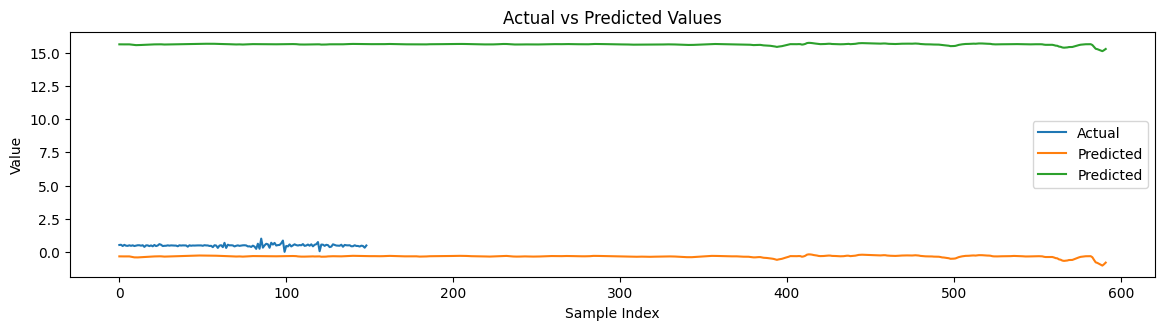

In [47]:
#import matplotlib.pyplot as plt

# Assuming y_test_original_scale and predictions are already defined

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))

# Line plot for actual and predicted values
plt.subplot(2, 1, 1)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()





In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Step 2: Data Collection
# Load your dataset
data = pd.read_csv('IRFC.NS_stock_data.csv')


In [65]:

# Step 3: Data Preprocessing
# Handle missing values, encode categorical variables, etc.
# For example:
data.fillna(method='ffill', inplace=True)
X = data.drop('ticker', axis=1)
y = data['ticker']



C:\Users\kiran\AppData\Local\Temp\ipykernel_1620\1637478740.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [66]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



ValueError: could not convert string to float: '2023-07-26'